1.What is Boosting in Machine Learning?

- Boosting is an ensemble method that builds models sequentially.
- Each model tries to correct errors made by the previous ones.
- It combines weak learners to form a strong learner.
- Helps improve prediction accuracy and reduce bias.
- Common algorithms: AdaBoost, Gradient Boosting, XGBoost.


2.What is the key idea behind AdaBoost?

- AdaBoost combines multiple weak classifiers into a strong classifier.
- It assigns higher weights to misclassified samples to focus on hard cases.
- Each weak learner is trained sequentially, improving on previous errors.
- Final prediction is a weighted vote of all weak learners.


3. Working of AdaBoost (Conceptual Example)

 Step 1: Initialize equal weights to all training samples
weights = [1/num_samples] * num_samples

 Step 2: For each iteration (weak learner):
  - Train a weak classifier using weighted samples
  - Calculate error rate on weighted samples
  - Compute learner weight based on error
  - Update sample weights: increase weights for misclassified samples

 Step 3: Final model combines weak learners weighted by their accuracy

 Example with simple data and weak classifiers (pseudo-code)

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=10, n_features=2, random_state=0)
sample_weights = np.ones(len(y)) / len(y)
models = []
model_weights = []

for i in range(3):  # 3 weak learners
    clf = DecisionTreeClassifier(max_depth=1)
    clf.fit(X, y, sample_weight=sample_weights)
    
    pred = clf.predict(X)
    error = np.sum(sample_weights * (pred != y)) / np.sum(sample_weights)
    
    # Avoid division by zero or error=0 or 1
    error = max(min(error, 1-1e-10), 1e-10)
    
    model_weight = 0.5 * np.log((1 - error) / error)
    
    # Update sample weights
    sample_weights = sample_weights * np.exp(-model_weight * y * pred)
    sample_weights = sample_weights / np.sum(sample_weights)
    
    models.append(clf)
    model_weights.append(model_weight)

print("Trained 3 weak learners with weighted errors and updated weights.")


4.What is Gradient Boosting, and how is it different from AdaBoost?

- Gradient Boosting builds models sequentially like AdaBoost but optimizes by minimizing a loss function using gradient descent.
- Each new model fits to the residual errors (gradients) of the combined previous models.
- AdaBoost focuses on adjusting sample weights to focus on misclassified points.
- Gradient Boosting directly optimizes prediction errors via gradient steps.
- Gradient Boosting is more flexible with loss functions and often yields better performance.


5.What is the loss function in Gradient Boosting?

- The loss function measures the difference between predicted and actual values.
- Gradient Boosting minimizes this loss by fitting new models to the negative gradients (residual errors).
- Common loss functions:
  - Mean Squared Error (MSE) for regression.
  - Log Loss (Cross-Entropy) for classification.


6.What is the loss function in Gradient Boosting?

- The loss function measures the difference between predicted and actual values.
- Gradient Boosting minimizes this loss by fitting new models to the negative gradients (residual errors).
- Common loss functions:
  - Mean Squared Error (MSE) for regression.
  - Log Loss (Cross-Entropy) for classification.


7.How does XGBoost improve over traditional Gradient Boosting?

- Uses regularization (L1 & L2) to reduce overfitting.
- Implements parallel and distributed computing for faster training.
- Handles missing values automatically.
- Supports tree pruning and early stopping.
- Efficient memory usage and scalability.
- Provides better performance and faster execution than traditional Gradient Boosting.


8.Difference between XGBoost and CatBoost:

- **Handling Categorical Features**:  
  - CatBoost natively supports categorical variables without explicit preprocessing.  
  - XGBoost requires manual encoding (like one-hot) for categorical data.

- **Training Speed and Efficiency**:  
  - CatBoost uses ordered boosting to reduce prediction shift, improving accuracy.  
  - XGBoost focuses on speed via parallel tree construction and gradient optimization.

- **Overfitting Control**:  
  - CatBoost includes techniques like ordered boosting and symmetric trees to reduce overfitting.  
  - XGBoost uses regularization (L1 & L2) and tree pruning for overfitting control.

- **Ease of Use**:  
  - CatBoost requires less data preprocessing, making it user-friendly for categorical data.  
  - XGBoost is more flexible but needs manual feature engineering.

- **Application Focus**:  
  - CatBoost excels with datasets having many categorical features.  
  - XGBoost is widely used for both regression and classification with mostly numeric features.


9.Real-world applications of Boosting techniques:

- Fraud detection in banking and finance.
- Customer churn prediction in telecom.
- Credit scoring and risk assessment.
- Medical diagnosis and disease prediction.
- Click-through rate prediction in online advertising.
- Sentiment analysis and text classification.
- Image classification and object detection.
- Recommendation systems.


10.How does regularization help in XGBoost?

- Regularization (L1 and L2) penalizes complex models to prevent overfitting.
- It controls model complexity by shrinking leaf weights.
- Encourages simpler, more generalizable trees.
- Improves prediction accuracy on unseen data.


11.Some hyperparameters to tune in Gradient Boosting models:

- `n_estimators`: Number of boosting stages (trees).
- `learning_rate`: Step size shrinkage to prevent overfitting.
- `max_depth`: Maximum depth of each tree.
- `min_samples_split`: Minimum samples to split a node.
- `min_samples_leaf`: Minimum samples required at a leaf node.
- `subsample`: Fraction of samples used for fitting individual trees.
- `colsample_bytree`: Fraction of features used per tree.
- `loss`: Loss function to optimize.
- `regularization parameters` (like `alpha` for L1, `lambda` for L2).


12.Feature Importance in Boosting:

- Measures how much each feature contributes to the model’s predictions.
- Calculated based on metrics like:
  - Gain: Improvement in accuracy by splits using the feature.
  - Frequency: How often the feature is used in splits.
  - Cover: Number of samples affected by splits on the feature.
- Helps identify the most influential features.
- Used for feature selection and model interpretation.


13.Why is CatBoost efficient for categorical data?

- CatBoost natively supports categorical features without needing extensive preprocessing.
- Uses ordered target statistics to convert categories into numerical values, reducing overfitting.
- Implements efficient handling of high-cardinality categorical features.
- Avoids one-hot encoding, saving memory and computation.
- Provides better accuracy and faster training on datasets with many categorical variables.


14.Train an AdaBoost Classifier on a sample dataset and print model accuracy

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 1.0000


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


15.Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

In [4]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing  # Recommended over deprecated boston dataset

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Regressor
model = AdaBoostRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.6498


16.Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=data.feature_names).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)


Feature Importances:
mean concave points        0.450528
worst concave points       0.240103
worst radius               0.075589
worst perimeter            0.051408
worst texture              0.039886
worst area                 0.038245
mean texture               0.027805
worst concavity            0.018725
concavity error            0.013068
area error                 0.008415
radius error               0.006870
worst smoothness           0.004811
fractal dimension error    0.004224
texture error              0.003604
mean compactness           0.002996
compactness error          0.002511
mean smoothness            0.002467
concave points error       0.002038
worst symmetry             0.001478
perimeter error            0.001157
mean concavity             0.000922
symmetry error             0.000703
smoothness error           0.000556
mean symmetry              0.000520
worst compactness          0.000450
mean area                  0.000425
mean perimeter             0.000201
worst f

17.Train a Gradient Boosting Regressor and evaluate using R-Squared Score


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared Score: {r2:.4f}")


R-Squared Score: 0.7756


18.Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

In [9]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 932.9 kB/s eta 0:02:41
   ---------------------------------------- 0.8/150.0 MB 1.3 MB/s eta 0:01:56
   ---------------------------------------- 1.0/150.0 MB 1.2 MB/s eta 0:02:02
   ---------------------------------------- 1.0/150.0 MB 1.2 MB/s eta 0:02:02
   ---------------------------------------- 1.6/150.0 MB 1.3 MB/s eta 0:01:55
   ---------------------------------------- 1.8/150.0 MB 1.2 MB/s eta 0:02:07
   ---------------------------------------- 1.8/150.0 MB 1.2 MB/s eta 0:02:07
    --------------------------------------- 2.1/150.0 MB 1.1 MB/s eta 0:02:15
    --------------------------------------- 2.4/150.0 MB 1.1 MB/s eta 0:02:19
    --------------------------------------- 2.4/150.0 MB 1.1 MB/s eta 0:02:19
    --------------------------------------- 2.6/150.0 MB 1.1 MB/s eta 0:02:1

In [10]:


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

# Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")
print(f"XGBoost Accuracy: {xgb_acc:.4f}")


Gradient Boosting Accuracy: 0.9561
XGBoost Accuracy: 0.9561


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:14:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


19.Train a CatBoost Classifier and evaluate using F1-Score

In [11]:
pip install catboost


   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/102.4 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.8/102.4 MB 1.2 MB/s eta 0:01:22
   ---------------------------------------- 0.8/102.4 MB 1.2 MB/s eta 0:01:22
   ---------------------------------------- 1.0/102.4 MB 1.1 MB/s eta 0:01:31
    --------------------------------------- 1.3/102.4 MB 987.4 kB/s eta 0:01:43
    --------------------------------------- 1.3/102.4 MB 987.4 kB/s eta 0:01:43
    --------------------------------------- 1.6/102.4 MB 953.2 kB/s eta 0:01:46
    --------------------------------------- 1.8/102.4 MB 932.3 kB/s eta 0:01:48
    --------------------------------------- 1.8/102.4 MB 932.3 kB/s eta 0:01:48
    --------------------------------------- 2.1/102.4 MB 924.9 kB/s eta 0:0

In [12]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")


F1-Score: 0.9790


20.Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.2226


21.Train an AdaBoost Classifier and visualize feature importance

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


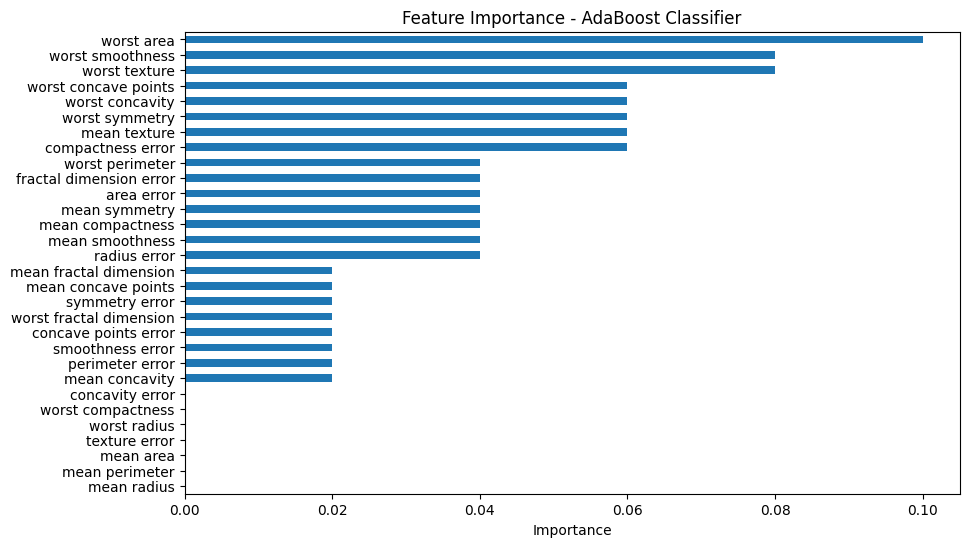

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
features = data.feature_names

# Plot
plt.figure(figsize=(10,6))
pd.Series(importances, index=features).sort_values().plot(kind='barh')
plt.title("Feature Importance - AdaBoost Classifier")
plt.xlabel("Importance")
plt.show()


22.Train a Gradient Boosting Regressor and plot learning curves

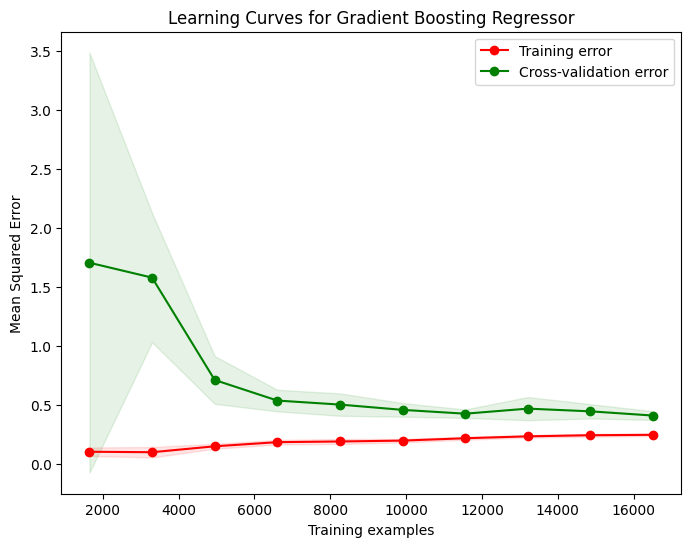

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = GradientBoostingRegressor(random_state=42)

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and std deviation
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation error')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.title('Learning Curves for Gradient Boosting Regressor')
plt.xlabel('Training examples')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()


23.Train an XGBoost Classifier and visualize feature importance

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


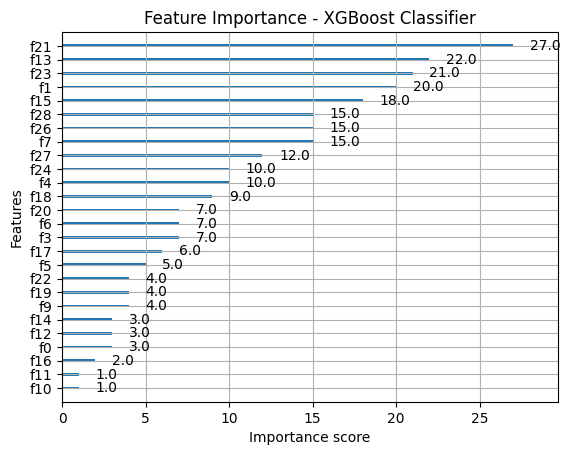

In [16]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(model)
plt.title("Feature Importance - XGBoost Classifier")
plt.show()


24.Train a CatBoost Classifier and plot the confusion matrix

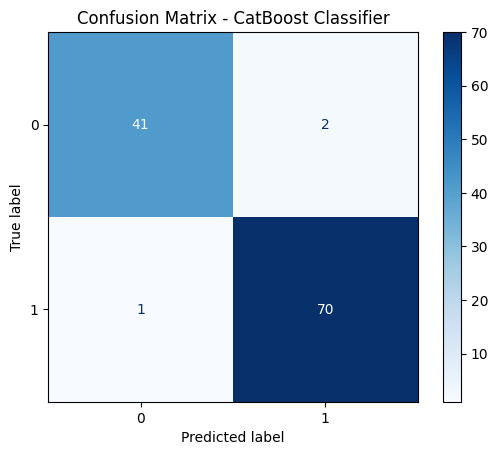

In [17]:
from catboost import CatBoostClassifier, Pool
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost Classifier
model = CatBoostClassifier(verbose=0, random_seed=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


25.Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

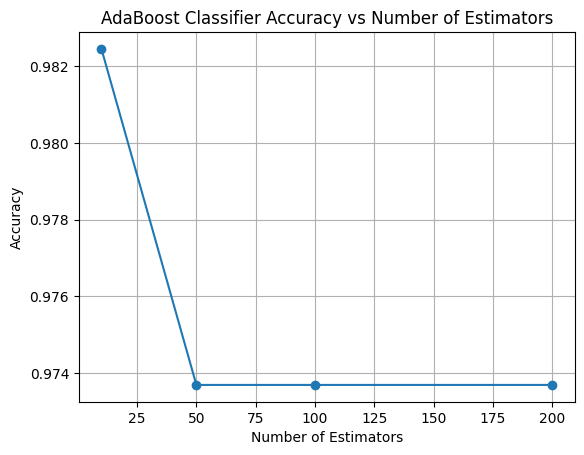

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = [10, 50, 100, 200]
accuracies = []

for n in estimators:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs number of estimators
plt.plot(estimators, accuracies, marker='o')
plt.title("AdaBoost Classifier Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


26.Train a Gradient Boosting Classifier and visualize the ROC curve

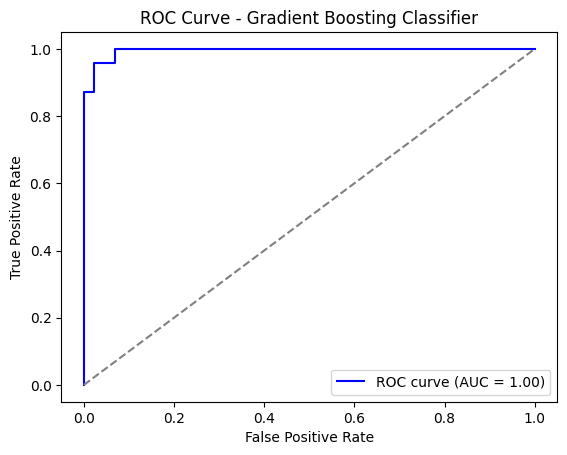

In [19]:

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend(loc="lower right")
plt.show()


27.Train an XGBoost Regressor and tune the learning rate using GridSearchCV

In [20]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=10, noise=0.1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Define parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best learning rate:", grid_search.best_params_['learning_rate'])
print("Test MSE:", mse)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best learning rate: 0.2
Test MSE: 3424.4534317083935


28.Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

In [21]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Create imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train without class weights
model_no_weights = CatBoostClassifier(random_seed=42, verbose=0)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

# Train with class weights
class_weights = [1, 9]  # Higher weight to minority class
model_with_weights = CatBoostClassifier(class_weights=class_weights, random_seed=42, verbose=0)
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)

print("Without Class Weights:")
print("Accuracy:", accuracy_score(y_test, y_pred_no_weights))
print(classification_report(y_test, y_pred_no_weights))

print("\nWith Class Weights:")
print("Accuracy:", accuracy_score(y_test, y_pred_with_weights))
print(classification_report(y_test, y_pred_with_weights))


Without Class Weights:
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       185
           1       0.73      0.73      0.73        15

    accuracy                           0.96       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.96      0.96      0.96       200


With Class Weights:
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       185
           1       0.63      0.80      0.71        15

    accuracy                           0.95       200
   macro avg       0.81      0.88      0.84       200
weighted avg       0.96      0.95      0.95       200



29.Train an AdaBoost Classifier and analyze the effect of different learning rates

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate: 0.01 - Accuracy: 0.9386
Learning rate: 0.05 - Accuracy: 0.9561


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate: 0.1 - Accuracy: 0.9561
Learning rate: 0.5 - Accuracy: 0.9649


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate: 1 - Accuracy: 0.9737


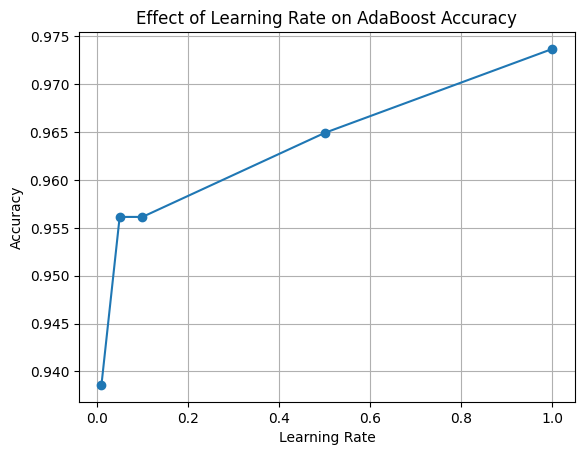

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different learning rates to test
learning_rates = [0.01, 0.05, 0.1, 0.5, 1]

accuracies = []

for lr in learning_rates:
    model = AdaBoostClassifier(learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Learning rate: {lr} - Accuracy: {acc:.4f}")

# Plot results
plt.plot(learning_rates, accuracies, marker='o')
plt.title("Effect of Learning Rate on AdaBoost Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


30.Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [23]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load iris dataset (3 classes)
data = load_iris()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost classifier for multi-class
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Train
xgb_clf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = xgb_clf.predict_proba(X_test)

# Calculate log-loss
loss = log_loss(y_test, y_pred_proba)

print(f"Log-Loss: {loss:.4f}")


Log-Loss: 0.0093


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:23:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
